### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\svkar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Read Datasets

In [2]:
amazon=pd.read_csv('amazon_prime_titles.csv')
netflix=pd.read_csv('netflix_titles.csv')
hulu=pd.read_csv('hulu_titles.csv')
disney=pd.read_csv('disney_plus_titles.csv')

### Global Functions

In [3]:
#function to drop high null value columns of dataframe
def drop_column(df, threshold=0.5):
    null_ratio=df.isnull().mean()
    cols_drop = null_ratio[null_ratio > threshold].index
    return df.drop(columns=cols_drop)

In [4]:
#function to create flag columns
def flag_create(df):
    df_copy = df.copy()
    for col in df.columns:
        if df[col].isnull().any():
            flag_col_name = f"{col}_missing"
            df_copy[flag_col_name] = df[col].isnull().astype(int)
    return df_copy

In [5]:
#fill missing values with unknown
def fill_unknown(df):
    df = df.copy()
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].fillna('Unknown')
    return df

### Netflix

In [37]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [38]:
netflix.shape

(8807, 12)

In [39]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [40]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [41]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [42]:
netflix.isnull().mean()*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [43]:
netflix=drop_column(netflix)

In [44]:
netflix_flagged=flag_create(netflix)

In [45]:
netflix_filled=fill_unknown(netflix_flagged)

In [46]:
netflix_filled.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_missing,cast_missing,country_missing,date_added_missing,rating_missing,duration_missing
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0,1,0,0,0,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,0,1,0,0,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,1,1,0,0,0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1,0,0,0,0,0


In [47]:
netflix_filled.isnull().mean()*100

show_id               0.0
type                  0.0
title                 0.0
director              0.0
cast                  0.0
country               0.0
date_added            0.0
release_year          0.0
rating                0.0
duration              0.0
listed_in             0.0
description           0.0
director_missing      0.0
cast_missing          0.0
country_missing       0.0
date_added_missing    0.0
rating_missing        0.0
duration_missing      0.0
dtype: float64

In [48]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')

# Find the earliest and latest dates
earliest_date = netflix['date_added'].min()
latest_date = netflix['date_added'].max()

print(f"Earliest date added: {earliest_date}")
print(f"Latest date added: {latest_date}")

Earliest date added: 2008-01-01 00:00:00
Latest date added: 2021-09-25 00:00:00


In [49]:
netflix_duplicated=netflix_filled.duplicated().sum()
print(netflix_duplicated)

0


In [50]:
netflix_filled['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [51]:
netflix_filled['listed_in'] = netflix_filled['listed_in'].str.split(', ')
netflix_exploded = netflix_filled.explode('listed_in')

In [52]:
netflix_exploded.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'director_missing', 'cast_missing', 'country_missing',
       'date_added_missing', 'rating_missing', 'duration_missing'],
      dtype='object')

In [53]:
netflix_exploded['date_added'] = pd.to_datetime(netflix_exploded['date_added'], errors='coerce')

In [54]:
netflix_exploded['year_added'] = netflix_exploded['date_added'].dt.year

In [55]:
grouped_netflix = netflix_exploded.groupby('year_added').agg({
    'type': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'director': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'cast': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'rating': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'listed_in': lambda x: x.mode().iloc[0] if not x.mode().empty else None
}).reset_index()

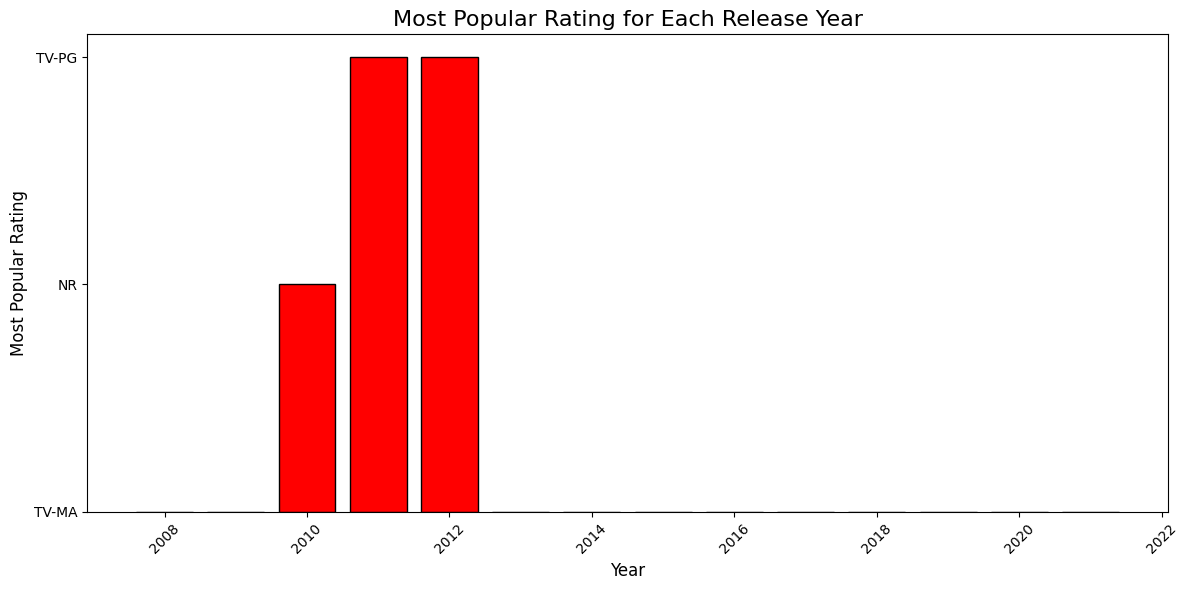

In [56]:
plt.figure(figsize=(12, 6))
plt.bar(grouped_netflix['year_added'], grouped_netflix['rating'], color='red', edgecolor='black')


plt.title('Most Popular Rating for Each Release Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Most Popular Rating', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
netflix_exploded['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

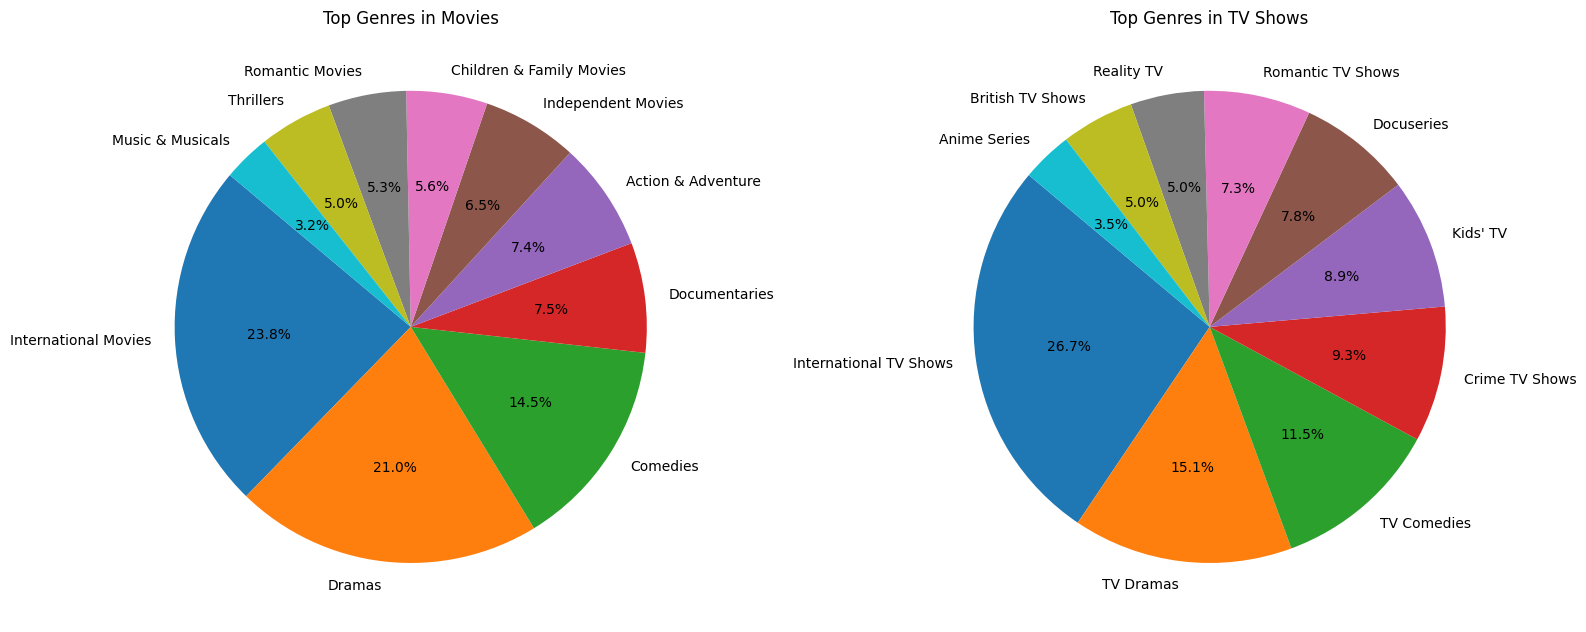

In [58]:
netflix_exploded['listed_in'] = netflix_exploded['listed_in'].dropna()

movies_netflix = netflix_exploded[netflix_exploded['type'] == 'Movie']
tv_shows_netflix = netflix_exploded[netflix_exploded['type'] == 'TV Show']

# Count genres
movie_genres = movies_netflix['listed_in'].value_counts().head(10)
tv_genres = tv_shows_netflix['listed_in'].value_counts().head(10)

# Plot side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie for Movies
axes[0].pie(movie_genres, labels=movie_genres.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Top Genres in Movies')

# Pie for TV Shows
axes[1].pie(tv_genres, labels=tv_genres.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Top Genres in TV Shows')

plt.tight_layout()
plt.show()

In [59]:
netflix_exploded['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

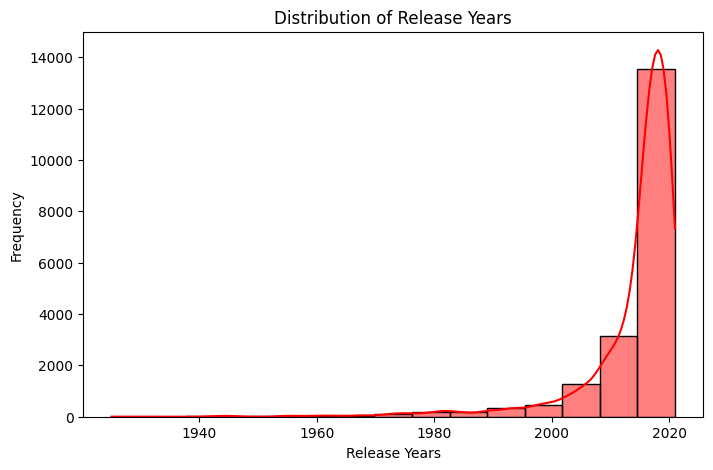

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(netflix_exploded['release_year'], bins=15, kde=True, color="red")
plt.title("Distribution of Release Years")
plt.xlabel("Release Years")
plt.ylabel("Frequency")
plt.show()

In [61]:
netflix_exploded['date_added_month']=pd.to_datetime(netflix_exploded['date_added']).dt.month

In [62]:
netflix_exploded['minute_duration']=netflix_exploded['duration'].str.extract(r'(\d+)').astype(float)

In [63]:
netflix_exploded['size_cast']=netflix_exploded['cast'].apply(lambda x: len(str(x).split(","))if pd.notnull(x) else 0)

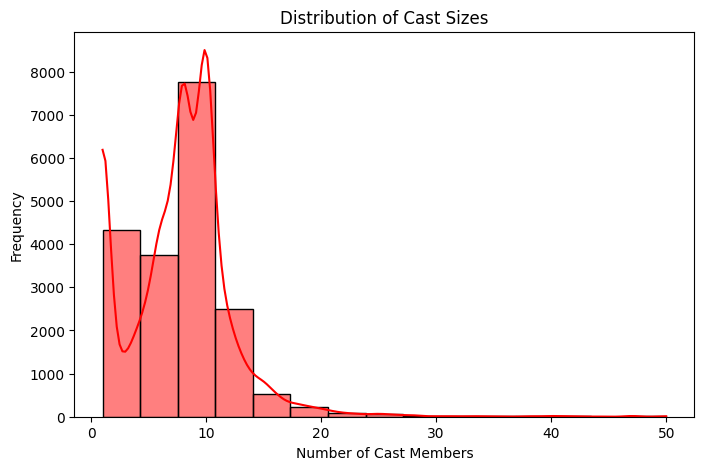

In [64]:
plt.figure(figsize=(8,5))
sns.histplot(netflix_exploded['size_cast'], bins=15, kde=True, color="red")
plt.title("Distribution of Cast Sizes")
plt.xlabel("Number of Cast Members")
plt.ylabel("Frequency")
plt.show()

In [65]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [66]:
from textblob import TextBlob

In [67]:
#sentiment score
netflix_exploded['description_sentiment']=netflix_exploded['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

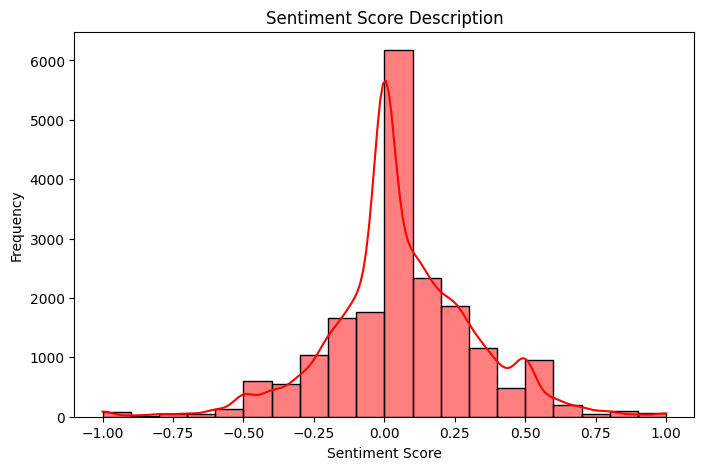

In [68]:
plt.figure(figsize=(8,5))
sns.histplot(netflix_exploded['description_sentiment'], bins=20, kde=True, color="red")
plt.title("Sentiment Score Description")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

In [70]:
netflix_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,cast_missing,country_missing,date_added_missing,rating_missing,duration_missing,year_added,date_added_month,minute_duration,size_cast,description_sentiment
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,...,1,0,0,0,0,2021.0,9.0,90.0,1,0.333333
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,0,0,0,0,0,2021.0,9.0,2.0,19,0.000000
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,0,0,0,0,0,2021.0,9.0,2.0,19,0.000000
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,0,0,0,0,0,2021.0,9.0,2.0,19,0.000000
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,...,0,1,0,0,0,2021.0,9.0,1.0,9,-0.050000


C:\Users\svkar\AppData\Local\Temp\ipykernel_48276\3572624746.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='description_sentiment', y='country', data=grouped_netflix, palette='coolwarm')


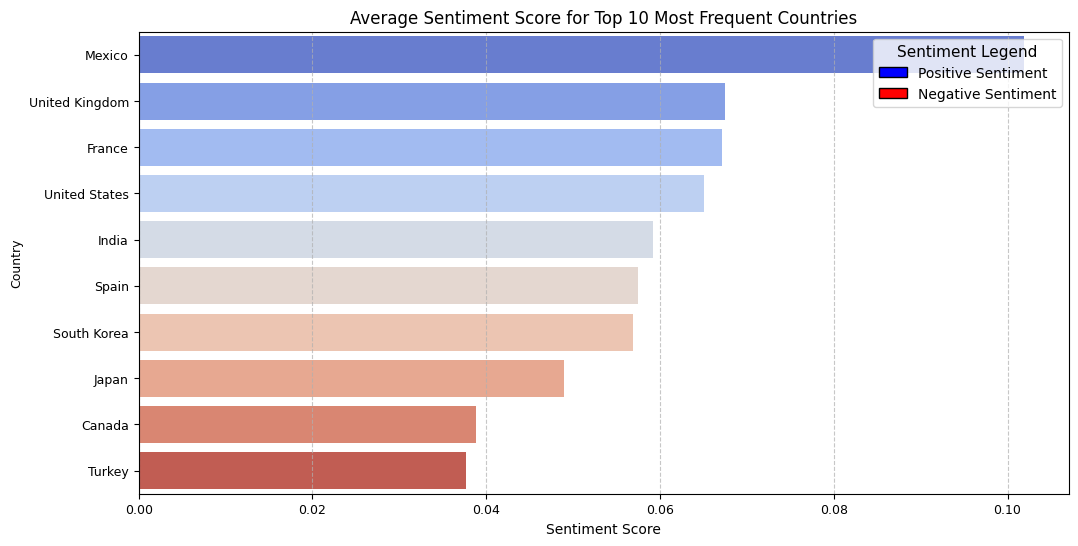

In [71]:
#netflix_exploded['country'] = netflix_exploded['country'].str.split(', ').explode()
top_countries = netflix_exploded['country'].value_counts().drop('Unknown', errors='ignore').nlargest(10).index
filtered_netflix = netflix_exploded[netflix_exploded['country'].isin(top_countries)]
grouped_netflix = filtered_netflix.groupby('country')['description_sentiment'].mean().reset_index()
grouped_netflix = grouped_netflix.sort_values(by='description_sentiment', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='description_sentiment', y='country', data=grouped_netflix, palette='coolwarm')

plt.title('Average Sentiment Score for Top 10 Most Frequent Countries', fontsize=12)
plt.xlabel('Sentiment Score', fontsize=10)
plt.ylabel('Country', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.grid(axis='x', linestyle='--', alpha=0.7)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', edgecolor='black', label='Positive Sentiment'),
    Patch(facecolor='red', edgecolor='black', label='Negative Sentiment')
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=10, title="Sentiment Legend", title_fontsize=11)

plt.show()

In [72]:
netflix_exploded['holiday_release'] = netflix_exploded['date_added_month'].apply(lambda x: 1 if x in [10, 11, 12] else 0)

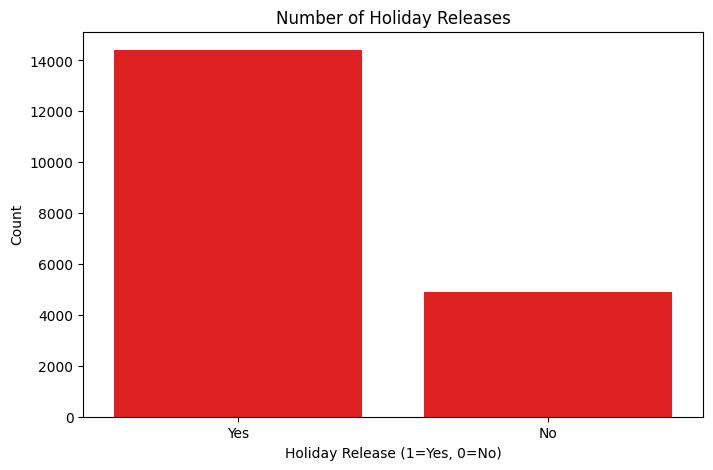

In [73]:
plt.figure(figsize=(8,5))
holiday_counts=netflix_exploded['holiday_release'].value_counts()
sns.barplot(x=holiday_counts.index, y=holiday_counts.values, color="red")
plt.title("Number of Holiday Releases")
plt.xlabel("Holiday Release (1=Yes, 0=No)")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=["Yes","No"])
plt.show()

In [74]:
netflix_exploded['country_multi']=netflix_exploded['country'].apply(lambda x: 1 if "," in str(x) else 0)

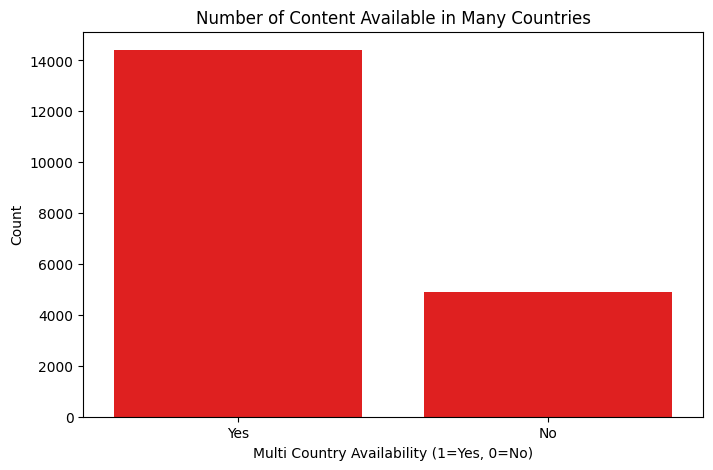

In [75]:
plt.figure(figsize=(8,5))
country_multi_counts=netflix_exploded['country_multi'].value_counts()
sns.barplot(x=country_multi_counts.index, y=holiday_counts.values, color="red")
plt.title("Number of Content Available in Many Countries")
plt.xlabel("Multi Country Availability (1=Yes, 0=No)")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=["Yes","No"])
plt.show()

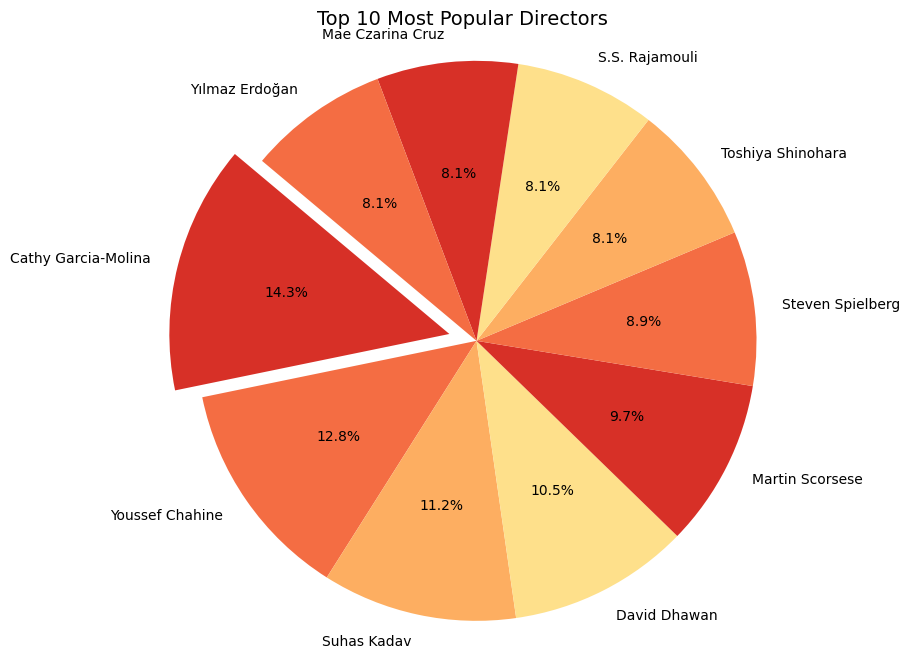

In [76]:
netflix_exploded = netflix_exploded[netflix_exploded['director'] != 'Unknown']

director_counts = netflix_exploded['director'].value_counts().nlargest(10) 

director_counts = director_counts.reset_index()
director_counts.columns = ['director', 'count']  

labels = director_counts['director']
sizes = director_counts['count']
explode = [0.1 if i == 0 else 0 for i in range(len(sizes))] 


colors = ['#d73027', '#f46d43', '#fdae61', '#fee08b', '#d73027', '#f46d43', '#fdae61', '#fee08b', '#d73027', '#f46d43']


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, colors=colors)
plt.title('Top 10 Most Popular Directors', fontsize=14)
plt.axis('equal')  

plt.show()

In [77]:
netflix_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,date_added_missing,rating_missing,duration_missing,year_added,date_added_month,minute_duration,size_cast,description_sentiment,holiday_release,country_multi
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,...,0,0,0,2021.0,9.0,90.0,1,0.333333,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,...,0,0,0,2021.0,9.0,1.0,9,-0.050000,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,...,0,0,0,2021.0,9.0,1.0,9,-0.050000,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,...,0,0,0,2021.0,9.0,1.0,9,-0.050000,0,0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,...,0,0,0,2021.0,9.0,1.0,16,0.000000,0,0


### Hulu

In [78]:
hulu.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


In [79]:
hulu.shape

(3073, 12)

In [80]:
hulu.describe()

,cast,release_year
count,0.0,3073.000000
mean,NaN,2012.567524
std,NaN,10.844069
min,NaN,1923.000000
25%,NaN,2010.000000
50%,NaN,2016.000000
75%,NaN,2019.000000
max,NaN,2021.000000


In [81]:
hulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 288.2+ KB


In [82]:
hulu.isnull().sum()

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64

In [83]:
hulu.isnull().mean()*100

show_id           0.000000
type              0.000000
title             0.000000
director         99.902376
cast            100.000000
country          47.282786
date_added        0.911162
release_year      0.000000
rating           16.921575
duration         15.587374
listed_in         0.000000
description       0.130166
dtype: float64

In [84]:
hulu=drop_column(hulu)

In [85]:
hulu_flagged=flag_create(hulu)

In [86]:
hulu_filled=fill_unknown(hulu_flagged)

In [87]:
hulu_filled.isna().mean()*100

show_id                0.0
type                   0.0
title                  0.0
country                0.0
date_added             0.0
release_year           0.0
rating                 0.0
duration               0.0
listed_in              0.0
description            0.0
country_missing        0.0
date_added_missing     0.0
rating_missing         0.0
duration_missing       0.0
description_missing    0.0
dtype: float64

In [88]:
hulu_filled['listed_in'] = hulu_filled['listed_in'].str.split(', ')
hulu_exploded = hulu_filled.explode('listed_in')

### Disney

In [89]:
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [90]:
disney.shape

(1450, 12)

In [91]:
disney.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [92]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [93]:
disney.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [94]:
disney.isnull().mean()*100

show_id          0.000000
type             0.000000
title            0.000000
director        32.620690
cast            13.103448
country         15.103448
date_added       0.206897
release_year     0.000000
rating           0.206897
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [95]:
disney=drop_column(disney)

In [96]:
disney_flagged=flag_create(disney)

In [97]:
disney_filled=fill_unknown(disney_flagged)

In [98]:
disney_filled.isnull().mean()*100

show_id               0.0
type                  0.0
title                 0.0
director              0.0
cast                  0.0
country               0.0
date_added            0.0
release_year          0.0
rating                0.0
duration              0.0
listed_in             0.0
description           0.0
director_missing      0.0
cast_missing          0.0
country_missing       0.0
date_added_missing    0.0
rating_missing        0.0
dtype: float64

In [99]:
disney_filled['listed_in'] = disney_filled['listed_in'].str.split(', ')
disney_exploded = disney_filled.explode('listed_in')

### Comparing Netflix to Other Platforms

In [100]:
amazon_exploded.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'director_missing',
       'cast_missing', 'rating_missing'],
      dtype='object')

In [101]:
amazon_exploded.shape

(18309, 13)

In [102]:
netflix_exploded.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'director_missing', 'cast_missing', 'country_missing',
       'date_added_missing', 'rating_missing', 'duration_missing',
       'year_added', 'date_added_month', 'minute_duration', 'size_cast',
       'description_sentiment', 'holiday_release', 'country_multi'],
      dtype='object')

In [103]:
netflix_exploded.shape

(13439, 25)

In [104]:
hulu_exploded.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'country_missing',
       'date_added_missing', 'rating_missing', 'duration_missing',
       'description_missing'],
      dtype='object')

In [105]:
hulu_exploded.shape

(6761, 15)

In [106]:
disney_exploded.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'director_missing', 'cast_missing', 'country_missing',
       'date_added_missing', 'rating_missing'],
      dtype='object')

In [107]:
disney_exploded.shape

(3910, 17)

In [108]:
def drop_show_id(df):
    df_copy = df.copy()  
    df_copy.drop(columns=['show_id'], inplace=True)  
    return df_copy  

In [109]:
amazon_final=drop_show_id(amazon_exploded)
netflix_final=drop_show_id(netflix_exploded)
hulu_final=drop_show_id(hulu_exploded)
disney_final=drop_show_id(disney_exploded)

In [110]:
print(amazon_final.shape)
print(netflix_final.shape)
print(hulu_final.shape)
print(disney_final.shape)

(18309, 12)
(13439, 24)
(6761, 14)
(3910, 16)


In [111]:
amazon_final['platform'] = 'Amazon'
netflix_final['platform'] = 'Netflix'
hulu_final['platform'] = 'Hulu'
disney_final['platform'] = 'Disney'

In [112]:
common_cols = list(set(amazon_final.columns) & set(netflix_final.columns) & set(hulu_final.columns) & set(disney_final.columns))

In [113]:
print(common_cols)

['title', 'rating_missing', 'platform', 'type', 'listed_in', 'duration', 'description', 'rating', 'release_year']


In [114]:
combined_platforms = pd.concat([amazon_final[['platform','listed_in', 'title', 'rating_missing','release_year','type','description','duration']],
                         netflix_final[['platform','listed_in', 'title', 'rating_missing','release_year','type','description','duration']],
                         hulu_final[['platform','listed_in', 'title', 'rating_missing','release_year','type','description','duration']],
                         disney_final[['platform','listed_in', 'title', 'rating_missing','release_year','type','description','duration']]])

In [115]:
combined_platforms.shape

(42419, 8)

In [116]:
combined_platforms.head()

,platform,listed_in,title,rating_missing,release_year,type,description,duration
0,Amazon,Comedy,The Grand Seduction,1,2014-01-01 00:00:00,Movie,A small fishing village must procure a local d...,113 min
0,Amazon,Drama,The Grand Seduction,1,2014-01-01 00:00:00,Movie,A small fishing village must procure a local d...,113 min
1,Amazon,Drama,Take Care Good Night,0,2018-01-01 00:00:00,Movie,A Metro Family decides to fight a Cyber Crimin...,110 min
1,Amazon,International,Take Care Good Night,0,2018-01-01 00:00:00,Movie,A Metro Family decides to fight a Cyber Crimin...,110 min
2,Amazon,Action,Secrets of Deception,1,2017-01-01 00:00:00,Movie,After a man discovers his wife is cheating on ...,74 min


In [117]:
combined_platforms.head()

,platform,listed_in,title,rating_missing,release_year,type,description,duration
0,Amazon,Comedy,The Grand Seduction,1,2014-01-01 00:00:00,Movie,A small fishing village must procure a local d...,113 min
0,Amazon,Drama,The Grand Seduction,1,2014-01-01 00:00:00,Movie,A small fishing village must procure a local d...,113 min
1,Amazon,Drama,Take Care Good Night,0,2018-01-01 00:00:00,Movie,A Metro Family decides to fight a Cyber Crimin...,110 min
1,Amazon,International,Take Care Good Night,0,2018-01-01 00:00:00,Movie,A Metro Family decides to fight a Cyber Crimin...,110 min
2,Amazon,Action,Secrets of Deception,1,2017-01-01 00:00:00,Movie,After a man discovers his wife is cheating on ...,74 min


In [161]:
combined_platforms['listed_in']=combined_platforms['listed_in'].replace('Dramas','Drama')

In [163]:
colors = {'Amazon': 'yellow', 'Netflix': 'red', 'Hulu': 'green', 'Disney': 'blue'}

In [164]:
genre_counts = combined_platforms.groupby(['platform', 'listed_in']).size().reset_index(name='count')
platform_totals = combined_platforms['platform'].value_counts().to_dict()
genre_counts['normalized'] = genre_counts.apply(lambda x: x['count'] / platform_totals[x['platform']], axis=1) #normalizing due to varying record counts

In [165]:
print(genre_counts)

    platform            listed_in  count  normalized
0     Amazon               Action   1657    0.090502
1     Amazon            Adventure    259    0.014146
2     Amazon            Animation    547    0.029876
3     Amazon                Anime     80    0.004369
4     Amazon             Arthouse    141    0.007701
..       ...                  ...    ...         ...
148  Netflix  TV Sci-Fi & Fantasy      5    0.000372
149  Netflix             TV Shows     11    0.000819
150  Netflix         TV Thrillers      3    0.000223
151  Netflix        Teen TV Shows      3    0.000223
152  Netflix            Thrillers    575    0.042786

[153 rows x 4 columns]


In [166]:
pivot = genre_counts.pivot(index='listed_in', columns='platform', values='normalized').fillna(0)

In [167]:
top_netflix_genres = pivot['Netflix'].sort_values(ascending=False).head(10).index
top_hulu_genres = pivot['Hulu'].sort_values(ascending=False).head(10).index
top_amazon_genres = pivot['Amazon'].sort_values(ascending=False).head(10).index
top_disney_genres = pivot['Disney'].sort_values(ascending=False).head(10).index
all_platform_genres = pd.concat([pivot['Netflix'], pivot['Hulu'], pivot['Amazon'], pivot['Disney']], axis=1)

In [169]:
pivot = genre_counts.pivot(index='listed_in', columns='platform', values='normalized').fillna(0)

In [170]:
all_platform_genres.head()

,Netflix,Hulu,Amazon,Disney
listed_in,,,,
Action,0.000000,0.082088,0.090502,0.000000
Action & Adventure,0.063323,0.000000,0.000000,0.000000
Action-Adventure,0.000000,0.000000,0.000000,0.115601
Adult Animation,0.000000,0.005473,0.000000,0.000000
Adventure,0.000000,0.082236,0.014146,0.000000


In [171]:
all_platform_genres.columns

Index(['Netflix', 'Hulu', 'Amazon', 'Disney'], dtype='object')

In [172]:
genre_totals = all_platform_genres.sum(axis=1)

top_genres = genre_totals.sort_values(ascending=False).head(10).index

In [173]:
filtered_pivot = pivot.loc[top_genres]

In [174]:
genre_totals_per_platform = filtered_pivot.div(filtered_pivot.sum(axis=1), axis=0)

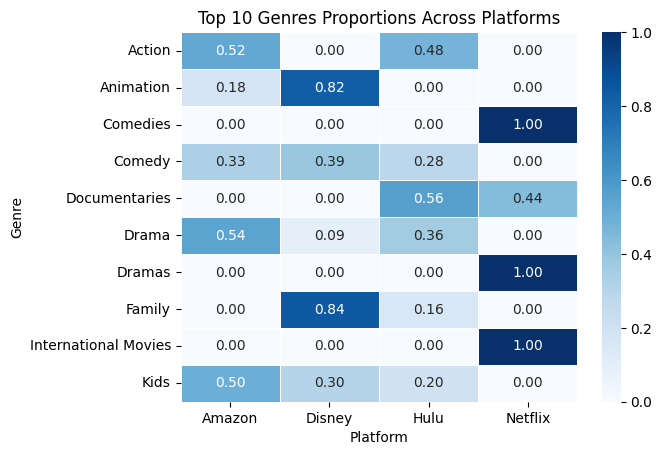

In [175]:
heatmap_data = plot_data.pivot(index='listed_in', columns='platform', values='proportion')
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)

plt.title('Top 10 Genres Proportions Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.show()

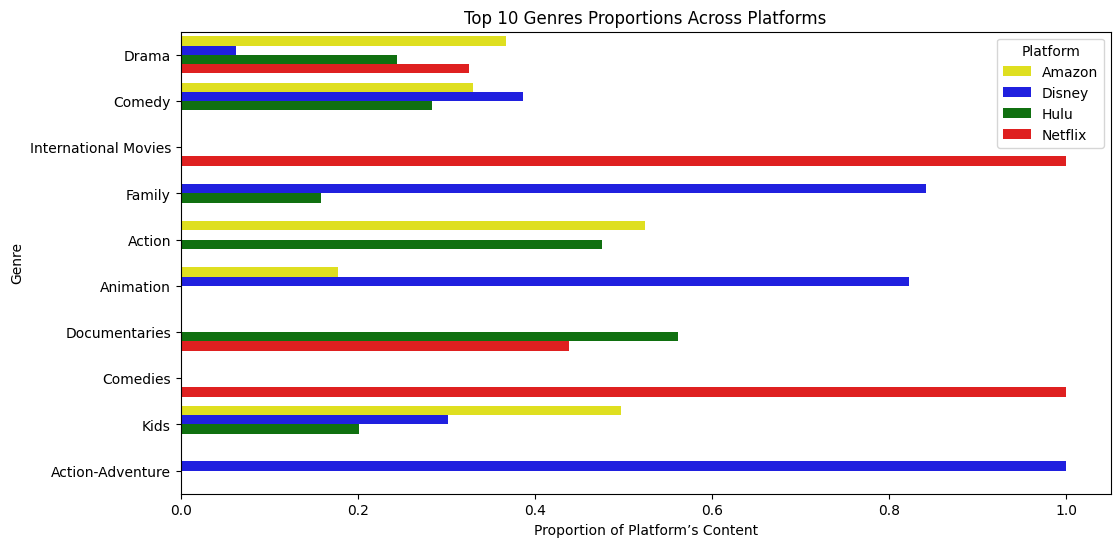

In [176]:
plot_data = genre_totals_per_platform.reset_index().melt(id_vars='listed_in', var_name='platform', value_name='proportion')

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='proportion', y='listed_in', hue='platform', palette=colors)
plt.title('Top 10 Genres Proportions Across Platforms')
plt.xlabel('Proportion of Platform’s Content')
plt.ylabel('Genre')
plt.legend(title='Platform')
plt.show()

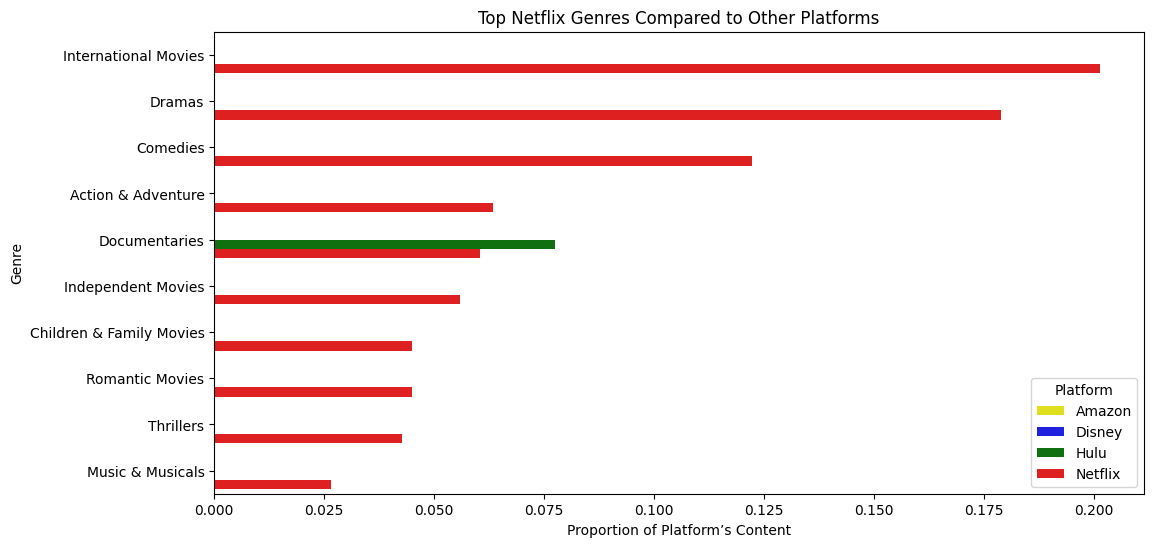

In [129]:
plot_data = pivot.loc[top_netflix_genres.tolist()]

# Melt for seaborn
plot_data = plot_data.reset_index().melt(id_vars='listed_in', var_name='platform', value_name='proportion')

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='proportion', y='listed_in', hue='platform', palette=colors)
plt.title('Top Netflix Genres Compared to Other Platforms')
plt.xlabel('Proportion of Platform’s Content')
plt.ylabel('Genre')
plt.legend(title='Platform')
plt.show()

In [140]:
combined_platforms.head()

,platform,listed_in,title,rating_missing,release_year,type,description,duration
0,Amazon,Comedy,The Grand Seduction,1,2014-01-01 00:00:00,Movie,A small fishing village must procure a local d...,113 min
0,Amazon,Drama,The Grand Seduction,1,2014-01-01 00:00:00,Movie,A small fishing village must procure a local d...,113 min
1,Amazon,Drama,Take Care Good Night,0,2018-01-01 00:00:00,Movie,A Metro Family decides to fight a Cyber Crimin...,110 min
1,Amazon,International,Take Care Good Night,0,2018-01-01 00:00:00,Movie,A Metro Family decides to fight a Cyber Crimin...,110 min
2,Amazon,Action,Secrets of Deception,1,2017-01-01 00:00:00,Movie,After a man discovers his wife is cheating on ...,74 min


In [177]:
colors = {
    'Movie': '#8B0000',  
    'TV Show': '#FF7F7F'  
}

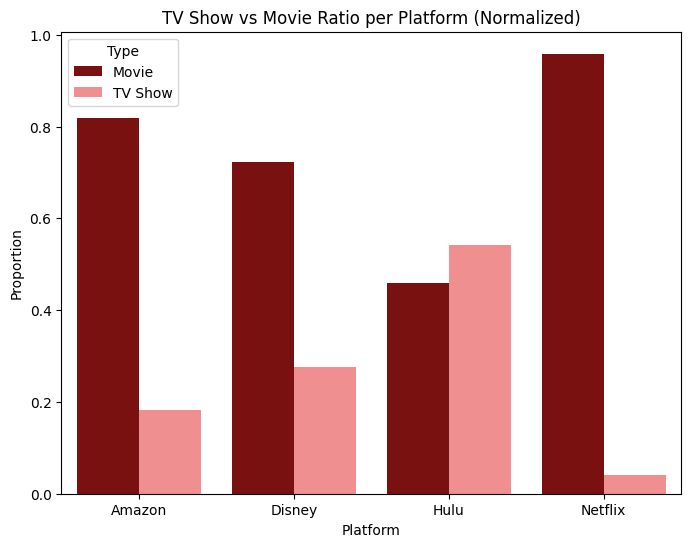

In [178]:
type_dist = combined_platforms.groupby(['platform', 'type']).size().reset_index(name='count')
platform_totals = combined_platforms['platform'].value_counts().to_dict()
type_dist['proportion'] = type_dist.apply(lambda x: x['count'] / platform_totals[x['platform']], axis=1)

plt.figure(figsize=(8,6))
sns.barplot(data=type_dist, x='platform', y='proportion', hue='type', palette=colors)
plt.title('TV Show vs Movie Ratio per Platform (Normalized)')
plt.ylabel('Proportion')
plt.xlabel('Platform')
plt.legend(title='Type')
plt.show()